## Análise do Artigo

Accurate occupancy detection of an office room from light, temperature, humidity and CO2 measurements using statistical learning models.

#### Bibliotecas necessárias

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Leitura dos arquivos

In [2]:
ocupacao = pd.read_csv('datatraining.txt')
ocupacao_teste = pd.read_csv('datatest.txt')

### Análise Exploratória dos Dados

In [4]:
ocupacao_teste.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [5]:
ocupacao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
date             8143 non-null object
Temperature      8143 non-null float64
Humidity         8143 non-null float64
Light            8143 non-null float64
CO2              8143 non-null float64
HumidityRatio    8143 non-null float64
Occupancy        8143 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB


In [6]:
ocupacao.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


In [3]:
ocupacao = ocupacao.drop('date',axis=1)    #Deixando somente variáveis numéricas
ocupacao_teste = ocupacao_teste.drop('date',axis=1)

Text(0, 0.5, 'Light')

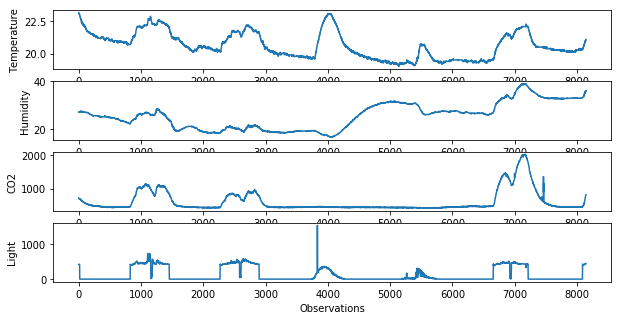

In [16]:
obs = np.linspace(0,8143,8143)

plt.figure(figsize=(10,5))
plt.subplot(4,1,1)
plt.plot(t,ocupacao['Temperature'])
plt.xlabel('Observations')
plt.ylabel('Temperature')

plt.subplot(4,1,2)
plt.plot(t,ocupacao['Humidity'])
plt.xlabel('Observations')
plt.ylabel('Humidity')

plt.subplot(4,1,3)
plt.plot(t,ocupacao['CO2'])
plt.xlabel('Observations')
plt.ylabel('CO2')

plt.subplot(4,1,4)
plt.plot(t,ocupacao['Light'])
plt.xlabel('Observations')
plt.ylabel('Light')

/home/cassio/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/cassio/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/cassio/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/cassio/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

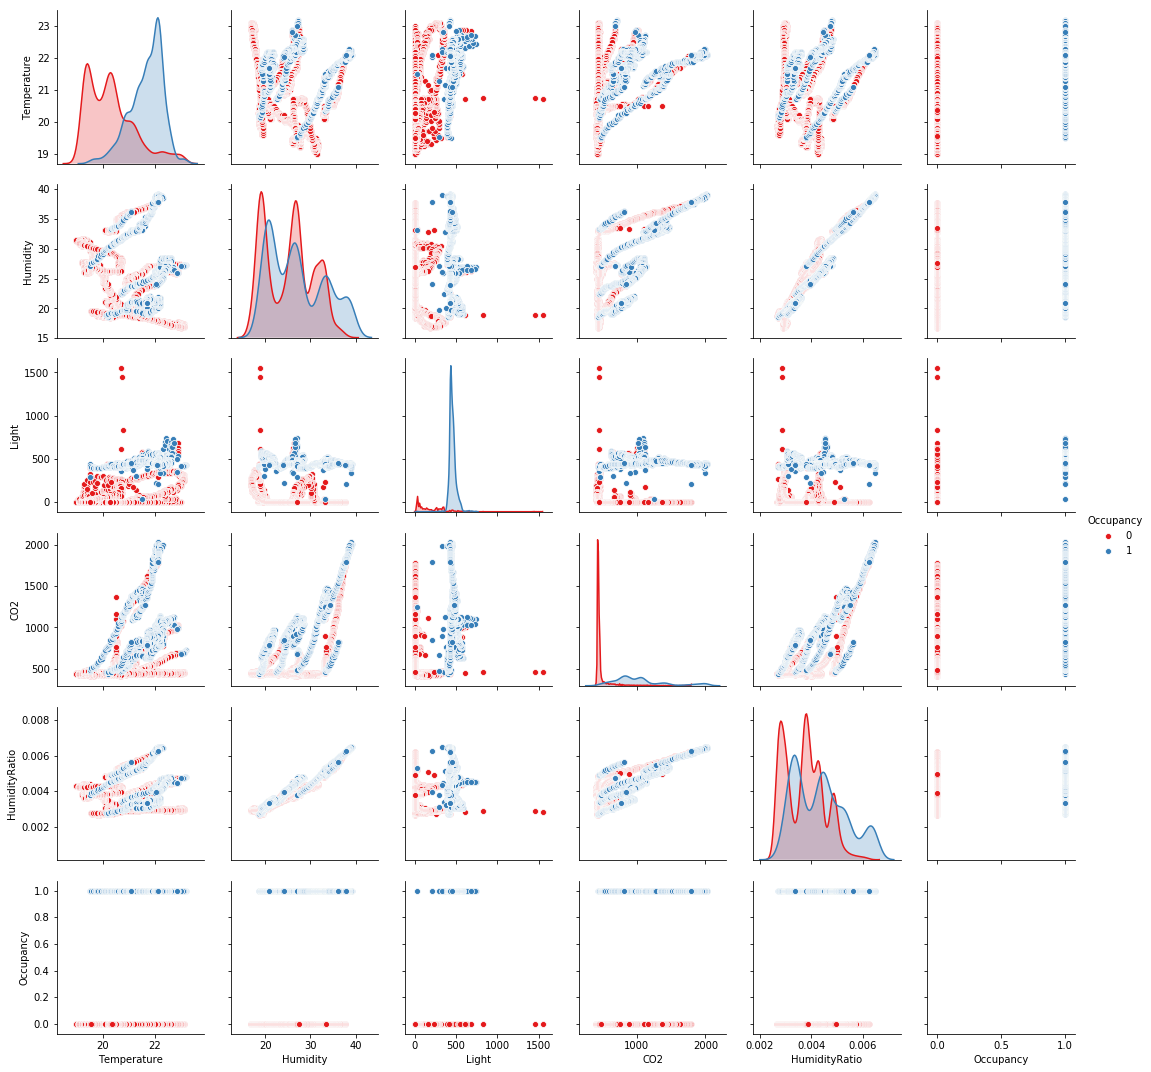

In [8]:
sns.pairplot(ocupacao,hue='Occupancy',palette='Set1')

In [9]:
print('Correlation Matrix \n')
print(ocupacao.corr())

Correlation Matrix 

               Temperature  Humidity     Light       CO2  HumidityRatio  \
Temperature       1.000000 -0.141759  0.649942  0.559894       0.151762   
Humidity         -0.141759  1.000000  0.037828  0.439023       0.955198   
Light             0.649942  0.037828  1.000000  0.664022       0.230420   
CO2               0.559894  0.439023  0.664022  1.000000       0.626556   
HumidityRatio     0.151762  0.955198  0.230420  0.626556       1.000000   
Occupancy         0.538220  0.132964  0.907352  0.712235       0.300282   

               Occupancy  
Temperature     0.538220  
Humidity        0.132964  
Light           0.907352  
CO2             0.712235  
HumidityRatio   0.300282  
Occupancy       1.000000  


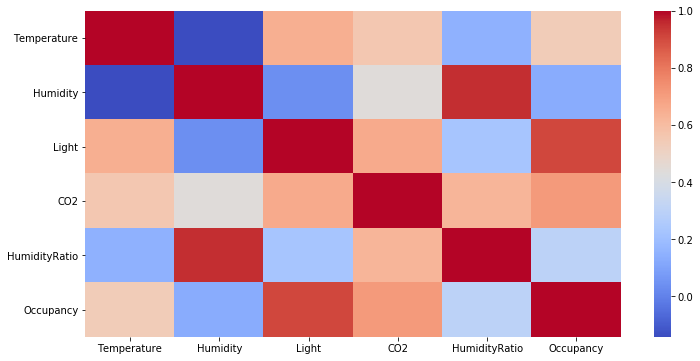

In [10]:
plt.figure(figsize=(12,6))
sns.heatmap(ocupacao.corr(),cmap='coolwarm')

#### Separação das variáveis de treinamento e teste

In [3]:
X_train = ocupacao.drop('Occupancy',axis=1)
y_train = ocupacao['Occupancy']

X_test = ocupacao_teste.drop('Occupancy',axis=1)
y_test = ocupacao_teste['Occupancy']

### Métodos de Machine Learning

In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


#### Rede Neural

In [17]:
redeNeural = MLPClassifier(verbose=True,max_iter=1000)
redeNeural.fit(X_train,y_train)

Iteration 1, loss = 1.90099971
Iteration 2, loss = 0.53905150
Iteration 3, loss = 0.11811781
Iteration 4, loss = 0.09379595
Iteration 5, loss = 0.08806781
Iteration 6, loss = 0.09118961
Iteration 7, loss = 0.08610711
Iteration 8, loss = 0.08356145
Iteration 9, loss = 0.07408826
Iteration 10, loss = 0.07155459
Iteration 11, loss = 0.08388369
Iteration 12, loss = 0.08165830
Iteration 13, loss = 0.06980284
Iteration 14, loss = 0.08544282
Iteration 15, loss = 0.06643077
Iteration 16, loss = 0.07073374
Iteration 17, loss = 0.09788177
Iteration 18, loss = 0.07971895
Iteration 19, loss = 0.06294306
Iteration 20, loss = 0.07289488
Iteration 21, loss = 0.08064439
Iteration 22, loss = 0.06462011
Iteration 23, loss = 0.08229801
Iteration 24, loss = 0.05624506
Iteration 25, loss = 0.06003797
Iteration 26, loss = 0.06582238
Iteration 27, loss = 0.05550746
Iteration 28, loss = 0.05435373
Iteration 29, loss = 0.05798588
Iteration 30, loss = 0.08388626
Iteration 31, loss = 0.06720899
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [18]:
previsoes = redeNeural.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix, classification_report

In [20]:
print(confusion_matrix(y_test,previsoes))
print(classification_report(y_test,previsoes))

[[1620   73]
 [   5  967]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1693
           1       0.93      0.99      0.96       972

   micro avg       0.97      0.97      0.97      2665
   macro avg       0.96      0.98      0.97      2665
weighted avg       0.97      0.97      0.97      2665



#### Random Forests

In [25]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=150)
rfc.fit(X_train,y_train)
#error = []
#for i in range(1,500):
    #rfc = RandomForestClassifier(n_estimators=i)
    #rfc.fit(X_train,y_train)
    #previsoes_i = rfc.predict(X_test)
    #error.append(np.mean(previsoes_i!=y_test))
    
#params_rfc = {'n_estimators':[50,100,150,200,250]}
#grid_rfc = GridSearchCV(RandomForestClassifier(),params_rfc,refit=True,verbose=3)
#grid_rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [26]:
#plt.figure(figsize=(10,6))
#plt.plot(range(1,500),error,linestyle='dashed',marker='o',markerfacecolor='red')

previsoes_rfc = rfc.predict(X_test)
#print(grid_rfc.best_params_)

In [27]:
print(confusion_matrix(y_test,previsoes_rfc))
print(classification_report(y_test,previsoes_rfc))

[[1642   51]
 [  79  893]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1693
           1       0.95      0.92      0.93       972

   micro avg       0.95      0.95      0.95      2665
   macro avg       0.95      0.94      0.95      2665
weighted avg       0.95      0.95      0.95      2665



#### Gradient Boosting Machine

In [28]:
gbm = GradientBoostingClassifier()
gbm.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [29]:
previsoes_gbm = gbm.predict(X_test)

In [30]:
print(classification_report(y_test,previsoes_gbm))
print(confusion_matrix(y_test,previsoes_gbm))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1693
           1       0.95      0.89      0.91       972

   micro avg       0.94      0.94      0.94      2665
   macro avg       0.94      0.93      0.93      2665
weighted avg       0.94      0.94      0.94      2665

[[1643   50]
 [ 111  861]]


#### Linear Discriminant Analysis

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [32]:
previsoes_lda = lda.predict(X_test)

In [33]:
print(confusion_matrix(y_test,previsoes_lda))
print(classification_report(y_test,previsoes_lda))

[[1638   55]
 [   1  971]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

   micro avg       0.98      0.98      0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



#### KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier

#error = []
#for i in range(1,100):
    #knn = KNeighborsClassifier(n_neighbors=i)
    #knn.fit(X_train,y_train)
    #previsoes_i = knn.predict(X_test)
    #error.append(np.mean(previsoes_i != y_test))

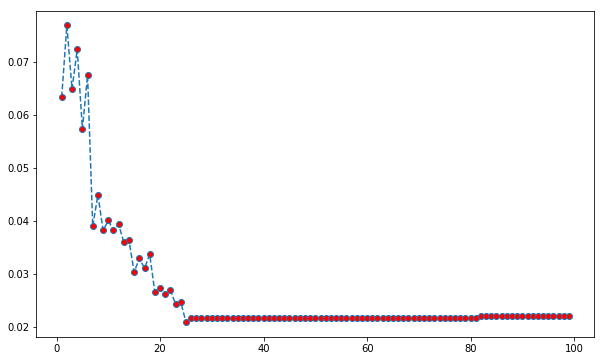

In [40]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error,linestyle='dashed',marker='o',markerfacecolor='red')

In [30]:
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X_train,y_train)
#params_knn = {'n_neighbors':[20,40,60,80,100]}

#grid_knn = GridSearchCV(KNeighborsClassifier(),params_knn,refit=True,verbose=3)

#grid_knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=40, p=2,
           weights='uniform')

In [31]:
previsoes_knn = knn.predict(X_test)

#print(grid_knn.best_params_)
print(classification_report(y_test,previsoes_knn))
print(confusion_matrix(y_test,previsoes_knn))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

   micro avg       0.98      0.98      0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665

[[1637   56]
 [   2  970]]


#### SVM

In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

params_grid = {'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001], 'kernel':['rbf']}
grid = GridSearchCV(SVC(),params_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

/home/cassio/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.7874769797421731, total=   1.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.7877671333824613, total=   1.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.7877671333824613, total=   1.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.7874769797421731, total=   0.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.7877671333824613, total=   0.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.7877671333824613, total=   0.8s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.8832412523020258, total=   0.7s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.8201915991156964, total=   0.7s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.8437730287398674, total=   0.6s
[CV] C=0.1, gamma=0.001, kernel=rbf .....

[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.8994104642593957, total=   0.2s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.9498894620486367, total=   0.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.7874769797421731, total=   1.8s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.7877671333824613, total=   1.9s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.7877671333824613, total=   1.9s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.7296500920810313, total=   1.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.7501842299189388, total=   1.0s
[CV] C=1000, gamma=0.1, kernel=rbf ..

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  1.1min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [48]:
grid.best_params_

{'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}

In [49]:
previsoes_svm = grid.predict(X_test)

In [50]:
print(classification_report(y_test,previsoes_svm))
print(confusion_matrix(y_test,previsoes_svm))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

   micro avg       0.98      0.98      0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665

[[1637   56]
 [   2  970]]


In [18]:
from sklearn.naive_bayes import GaussianNB

GB = GaussianNB()

GB.fit(X_train,y_train)

previsoes_gb = GB.predict(X_test)

print(classification_report(y_test,previsoes_gb))
print(confusion_matrix(y_test,previsoes_gb))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      0.99      0.97       972

   micro avg       0.98      0.98      0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665

[[1638   55]
 [   5  967]]


In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

#### Stacking Classifier

In [34]:
from mlxtend.classifier import StackingCVClassifier
from sklearn.model_selection import cross_val_score

sclf = StackingCVClassifier(classifiers=[rfc,knn,GB,lr],meta_classifier=lr)

sclf.fit(X_train.values,y_train.values)

previsoes_sclf = sclf.predict(X_test)

print(classification_report(y_test,previsoes_sclf))
print(confusion_matrix(y_test,previsoes_sclf))

/home/cassio/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/cassio/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1693
           1       0.95      0.91      0.93       972

   micro avg       0.95      0.95      0.95      2665
   macro avg       0.95      0.94      0.95      2665
weighted avg       0.95      0.95      0.95      2665

[[1643   50]
 [  83  889]]


/home/cassio/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/cassio/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Tsfresh

In [15]:
time = np.linspace(1,8143,8143)
ide = np.ones(8143)
ocupacao['id'] = ide.astype(int)
ocupacao['time_step'] = time.astype(int)

In [16]:
ocupacao.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,time_step,id
1,23.18,27.2720,426.0,721.25,0.004793,1,1,1
2,23.15,27.2675,429.5,714.00,0.004783,1,2,1
3,23.15,27.2450,426.0,713.50,0.004779,1,3,1
4,23.15,27.2000,426.0,708.25,0.004772,1,4,1
5,23.10,27.2000,426.0,704.50,0.004757,1,5,1


In [ ]:
from tsfresh import extract_features, select_features

extracted_features = extract_features(ocupacao, column_id = 'id', column_sort = 'time_step')
#extracted_features = extract_features(ocupacao, column_id = 'Occupancy', column_sort = 'time_step')

Feature Extraction:  17%|█▋        | 1/6 [01:53<09:26, 113.34s/it]

In [30]:
from tsfresh.utilities.dataframe_functions import impute

impute(extracted_features)

 'Light__friedrich_coefficients__m_3__r_30__coeff_1'
 'Light__friedrich_coefficients__m_3__r_30__coeff_2'
 'Light__friedrich_coefficients__m_3__r_30__coeff_3'
 'Light__max_langevin_fixed_point__m_3__r_30'
 'Temperature__friedrich_coefficients__m_3__r_30__coeff_0'
 'Temperature__friedrich_coefficients__m_3__r_30__coeff_1'
 'Temperature__friedrich_coefficients__m_3__r_30__coeff_2'
 'Temperature__friedrich_coefficients__m_3__r_30__coeff_3'
 'Temperature__max_langevin_fixed_point__m_3__r_30'] did not have any finite values. Filling with zeros.


variable,CO2__abs_energy,CO2__absolute_sum_of_changes,"CO2__agg_autocorrelation__f_agg_""mean""","CO2__agg_autocorrelation__f_agg_""median""","CO2__agg_autocorrelation__f_agg_""var""","CO2__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","CO2__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","CO2__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","CO2__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","CO2__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,Temperature__time_reversal_asymmetry_statistic__lag_1,Temperature__time_reversal_asymmetry_statistic__lag_2,Temperature__time_reversal_asymmetry_statistic__lag_3,Temperature__value_count__value_-inf,Temperature__value_count__value_0,Temperature__value_count__value_1,Temperature__value_count__value_inf,Temperature__value_count__value_nan,Temperature__variance,Temperature__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
0,1.691980e+09,23054.266667,0.88491,0.893044,0.004255,469.479683,0.103291,0.093774,0.035694,476.173614,...,-0.772880,-1.536885,-2.295545,0.0,0.0,0.0,0.0,0.0,0.827922,0.0
1,2.108227e+09,13107.383333,0.88360,0.888671,0.005396,707.801120,0.549904,4.141417,0.481026,761.210714,...,-2.337938,-4.688288,-7.007797,0.0,0.0,0.0,0.0,0.0,0.387769,0.0


In [37]:
features_filtered = select_features(extracted_features,y_train)

ValueError: Index of X must be a subset of y's index